<a href="https://colab.research.google.com/github/archie-cm/Customer-Personality-Analysis-Segmentation/blob/main/Predict_Customer_Personality_to_Boost_Marketing_Campaign_by_using_Machine_Learning_Archie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
- Melakukan feature engineering: conversion rate
- Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
- Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
- Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini project/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,"58,138,000.00",0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,"46,344,000.00",1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,"71,613,000.00",0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,"26,646,000.00",1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,"58,293,000.00",1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,"61,223,000.00",0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,"64,014,000.00",2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,"56,981,000.00",0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,"69,245,000.00",0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [ ]:
# convert string to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kids']> 0, 1, 0)

In [ ]:
#age_range
df['age_range'] = pd.qcut(df['age'],5, labels=['child','teens','young_adults','middle_adults','older_adults'])
df['age_range']

0       middle_adults
1        older_adults
2       middle_adults
3               child
4               child
            ...      
2235     young_adults
2236     older_adults
2237            child
2238     older_adults
2239     older_adults
Name: age_range, Length: 2240, dtype: category
Categories (5, object): ['child' < 'teens' < 'young_adults' < 'middle_adults' < 'older_adults']

In [ ]:
# amount spent
df['total_amount_spent'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df ['MntMeatProducts'] + df['MntSweetProducts']
df['total_amount_spent']

0       1617000
1         27000
2        776000
3         53000
4        422000
         ...   
2235    1341000
2236     444000
2237    1241000
2238     843000
2239     172000
Name: total_amount_spent, Length: 2240, dtype: int64

In [ ]:
# acceped campaigns
df['total_accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['total_accepted_campaign']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: total_accepted_campaign, Length: 2240, dtype: int64

In [ ]:
# total transaction
df['total_transaction'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['total_transaction']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: total_transaction, Length: 2240, dtype: int64

In [ ]:
df['conversion_rate'] = df['total_transaction'] / df['NumWebVisitsMonth']
df['conversion_rate']

0      3.57
1      1.20
2      5.25
3      1.33
4      3.80
       ... 
2235   3.60
2236   3.14
2237   3.17
2238   7.67
2239   1.57
Name: conversion_rate, Length: 2240, dtype: float64

In [ ]:
df['conversion_rate'].sort_values(ascending=False)

975     inf
1773    inf
905     inf
1955    inf
1910    inf
       ... 
774    0.05
1524   0.00
981    0.00
655     NaN
2132    NaN
Name: conversion_rate, Length: 2240, dtype: float64

In [ ]:
df['conversion_rate'].replace([np.inf, np.nan], 0, inplace = True)

## EDA

In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"2,240.00","1,119.50",646.78,0.00,559.75,"1,119.50","1,679.25","2,239.00"
ID,"2,240.00","5,592.16","3,246.66",0.00,"2,828.25","5,458.50","8,427.75","11,191.00"
Year_Birth,"2,240.00","1,968.81",11.98,"1,893.00","1,959.00","1,970.00","1,977.00","1,996.00"
Income,"2,216.00","52,247,251.35","25,173,076.66","1,730,000.00","35,303,000.00","51,381,500.00","68,522,000.00","666,666,000.00"
Kidhome,"2,240.00",0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,"2,240.00",0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,"2,240.00",49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntCoke,"2,240.00","303,935.71","336,597.39",0.00,"23,750.00","173,500.00","504,250.00","1,493,000.00"
MntFruits,"2,240.00","26,302.23","39,773.43",0.00,"1,000.00","8,000.00","33,000.00","199,000.00"
MntMeatProducts,"2,240.00","166,950.00","225,715.37",0.00,"16,000.00","67,000.00","232,000.00","1,725,000.00"


In [ ]:
df.describe(include=object)

,Education,Marital_Status
count,2240,2240
unique,5,6
top,S1,Menikah
freq,1127,864


In [ ]:
nums = ['Year_Birth','Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits', 'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue','Response', 'age','join_at_age','total_kids', 'is_parent','total_amount_spent', 'total_accepted_campaign','total_transaction', 'conversion_rate']
cats = ['Education','Marital_Status','Dt_Customer','age_range']

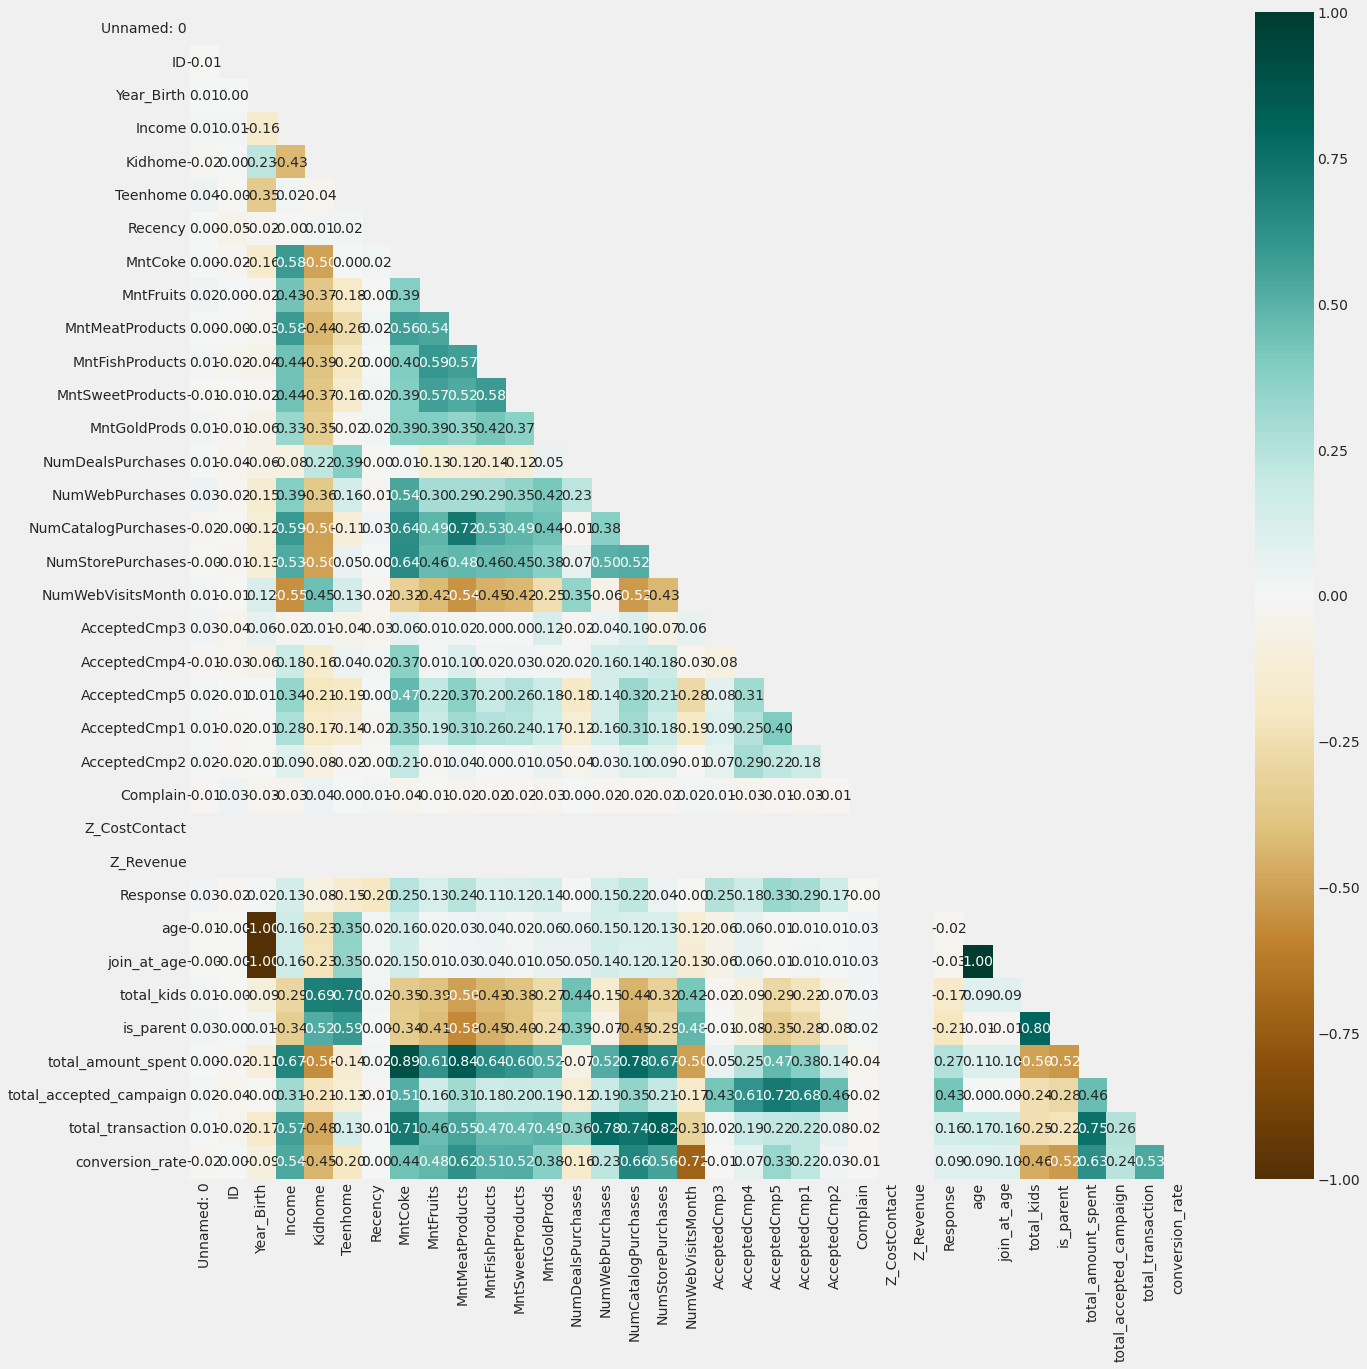

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap='BrBG', annot=True, vmin=-1, vmax=1, mask=mask, fmt='.2f')

### Income vs Spending

(0.0, 120000000.0)

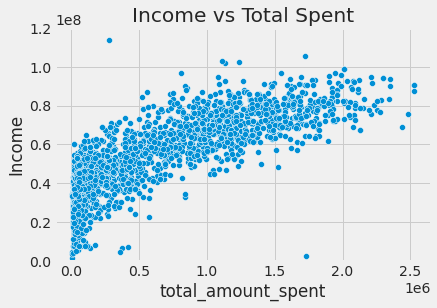

In [ ]:
sns.scatterplot(x=df['total_amount_spent'], y=df['Income'])
plt.title('Income vs Total Spent')
plt.ylim(0, 120000000)

(0.0, 120000000.0)

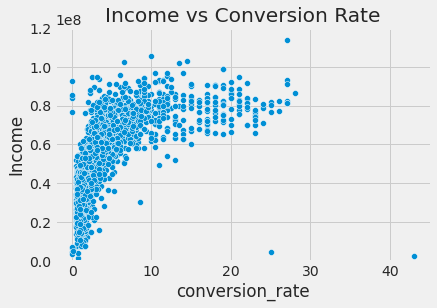

In [ ]:
sns.scatterplot(x=df['conversion_rate'], y=df['Income'])
plt.title('Income vs Conversion Rate')
plt.ylim(0, 120000000)

## Age vs Spending & Income

(0.0, 120000000.0)

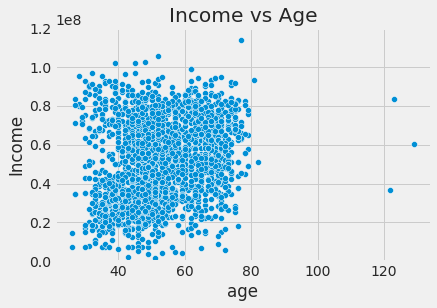

In [ ]:
sns.scatterplot(x=df['age'], y=df['Income'])
plt.title('Income vs Age')
plt.ylim(0, 120000000)

Text(0.5, 1.0, 'Conversion Rate vs Age')

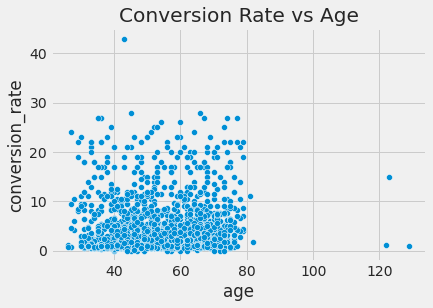

In [ ]:
sns.scatterplot(x=df['age'], y=df['conversion_rate'])
plt.title('Conversion Rate vs Age')

Text(0.5, 1.0, 'total_amount_spent vs age')

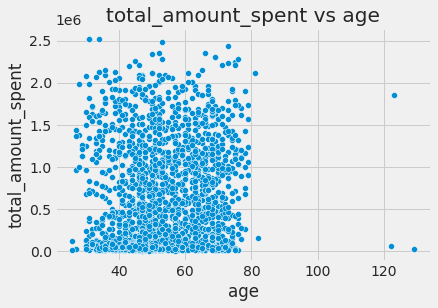

In [ ]:
sns.scatterplot(x=df['age'], y=df['total_amount_spent'])
plt.title('total_amount_spent vs age')

Text(0.5, 1.0, 'conversion rate vs total_amount_spent')

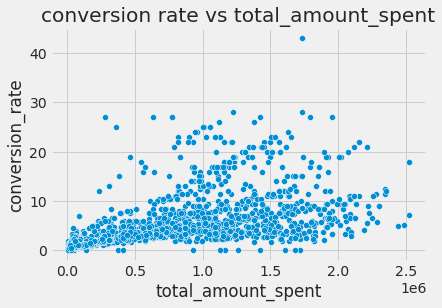

In [ ]:
sns.scatterplot(x=df['total_amount_spent'], y=df['conversion_rate'])
plt.title('conversion rate vs total_amount_spent')

# EDA: Conversion rate analysis based on income, spending and age

## Handling Missing Value

In [ ]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Income                    1.07
Unnamed: 0                0.00
Response                  0.00
AcceptedCmp4              0.00
AcceptedCmp5              0.00
AcceptedCmp1              0.00
AcceptedCmp2              0.00
Complain                  0.00
Z_CostContact             0.00
Z_Revenue                 0.00
age                       0.00
NumWebVisitsMonth         0.00
join_at_age               0.00
total_kids                0.00
is_parent                 0.00
age_range                 0.00
total_amount_spent        0.00
total_accepted_campaign   0.00
total_transaction         0.00
AcceptedCmp3              0.00
NumStorePurchases         0.00
ID                        0.00
NumCatalogPurchases       0.00
Year_Birth                0.00
Education                 0.00
Marital_Status            0.00
Kidhome                   0.00
Teenhome                  0.00
Dt_Customer               0.00
Recency                   0.00
MntCoke                   0.00
MntFruits                 0.00
MntMeatP

karena nilai null pada kolom income < 4% maka akan didrop

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0                 0
Response                   0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
age                        0
NumWebVisitsMonth          0
join_at_age                0
total_kids                 0
is_parent                  0
age_range                  0
total_amount_spent         0
total_accepted_campaign    0
total_transaction          0
AcceptedCmp3               0
NumStorePurchases          0
ID                         0
Recency                    0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
MntCoke                    0
NumCatalogPurchases        0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProduc

### Handling Duplicated

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2216, 39)

## Data Preprocessing

### Feature Encoding

In [ ]:
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('-----'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
-------------------------------------------------- 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
-------------------------------------------------- 

value counts of column Dt_Customer
2012-08-31    12
2012-12-09    11
2013-02-14    11
2014-12-05    11
2013-08-20    10
              ..
2012-05-08     1
2012-11-18     1
2014-09-05     1
2013-06-26     1
2014-09-01     1
Name: Dt_Customer, Length: 662, dtype: int64
-------------------------------------------------- 

value counts of column age_range
child            472
young_adults     454
teens            441
middle_adults    430
older_adults     419
Name: age_range, dtype: int64
-------------------------------------------------- 



In [ ]:
# label encoder
mapping_education = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 3,
    'S3': 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)
df['Education_mapped']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education_mapped, Length: 2216, dtype: int64

In [ ]:
# One Hot Encoder
df_cats = df[['Education']].copy()
for cat in ['Marital_Status','age_range','is_parent']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df_cats = df_cats.join(onehots)

In [ ]:
df_cats

,Education,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_range_child,age_range_teens,age_range_young_adults,age_range_middle_adults,age_range_older_adults,is_parent_0,is_parent_1
0,S1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,S1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,S1,1,0,0,0,0,0,0,0,0,1,0,1,0
3,S1,1,0,0,0,0,0,1,0,0,0,0,0,1
4,S3,0,0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,0,0,0,0,0,1,0,0,1,0,0,0,1
2236,S3,1,0,0,0,0,0,0,0,0,0,1,0,1
2237,S1,0,1,0,0,0,0,1,0,0,0,0,1,0
2238,S2,1,0,0,0,0,0,0,0,0,0,1,0,1


### Feature Standarization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2216 non-null   int64         
 1   ID                       2216 non-null   int64         
 2   Year_Birth               2216 non-null   int64         
 3   Education                2216 non-null   object        
 4   Marital_Status           2216 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2216 non-null   int64         
 7   Teenhome                 2216 non-null   int64         
 8   Dt_Customer              2216 non-null   datetime64[ns]
 9   Recency                  2216 non-null   int64         
 10  MntCoke                  2216 non-null   int64         
 11  MntFruits                2216 non-null   int64         
 12  MntMeatProducts          2216 non-

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in nums:
  df_scaled[col] = ss.fit_transform(df_scaled[[col]])

df_scaled

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parent,age_range,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Education_mapped
0,0,5524,-0.99,S1,Lajang,0.23,-0.82,-0.93,2012-04-09,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.55,0.69,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,2.38,0.99,0.90,-1.26,-1.58,middle_adults,1.68,-0.44,1.32,-0.17,2
1,1,2174,-1.24,S1,Lajang,-0.23,1.04,0.91,2014-08-03,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.24,1.31,1.41,0.63,older_adults,-0.96,-0.44,-1.16,-0.65,2
2,2,4141,-0.32,S1,Bertunangan,0.77,-0.82,-0.93,2013-08-21,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.32,0.32,-1.26,-1.58,middle_adults,0.28,-0.44,0.80,0.18,2
3,3,6182,1.27,S1,Bertunangan,-1.02,1.04,-0.93,2014-10-02,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.55,0.28,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.27,-1.18,0.07,0.63,child,-0.92,-0.44,-0.90,-0.63,2
4,4,5324,1.02,S3,Menikah,0.24,1.04,-0.93,2014-01-19,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,0.07,0.63,child,-0.31,-0.44,0.54,-0.12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,-0.15,S1,Menikah,0.36,-0.82,0.91,2013-06-13,-0.10,1.20,0.42,0.07,0.08,2.22,3.92,-0.17,1.79,0.11,-0.55,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.15,0.15,0.07,0.63,young_adults,1.22,-0.44,0.41,-0.16,2
2236,2236,4001,-1.90,S3,Bertunangan,0.47,2.90,0.91,2014-10-06,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.43,1.43,-0.23,-0.25,0.69,-0.28,-0.28,-0.28,3.82,-0.12,-0.10,0.00,0.00,-0.42,1.90,1.98,2.74,0.63,older_adults,-0.27,1.03,0.93,-0.26,4
2237,2237,7270,1.02,S1,Cerai,0.19,-0.82,-0.93,2014-01-25,1.45,1.79,0.54,0.22,-0.10,-0.37,-0.39,-0.69,-0.76,0.11,2.22,0.28,-0.28,3.54,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,-1.26,-1.58,child,1.05,1.03,0.54,-0.25,2
2238,2238,8235,-1.07,S2,Bertunangan,0.68,-0.82,0.91,2014-01-24,-1.42,0.36,0.09,0.21,0.77,0.07,0.33,-0.17,0.70,0.80,1.29,-0.96,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.07,1.15,0.07,0.63,older_adults,0.39,-0.44,1.06,0.67,3


# Data Modelling : K-means Clustering

[229845588.6939085, 102426415.19977236, 57949165.348453805, 37030301.30980153, 25831994.145973776, 19000031.61978841, 14529107.183298409, 11552300.861309174, 9344610.618896313, 7734233.668180998, 6513141.243359352, 5522591.421529628, 4783258.682909608, 4177210.3744987003, 3674367.4670158597, 3286391.4266793695, 2931115.7100177733, 2649278.7224784843]


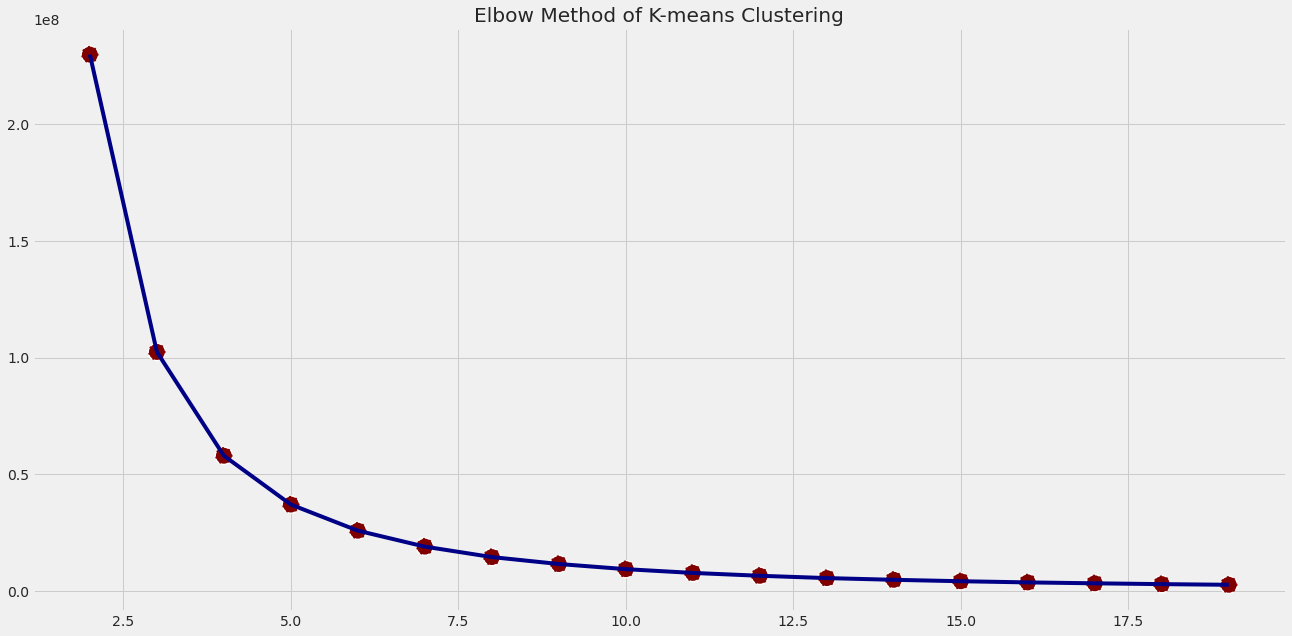

In [ ]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
inertia = []

for i in range(2, 20):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X.values)
  inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20,10))
plt.title('Elbow Method of K-means Clustering')

sns.lineplot(x=range(2,20), y=inertia, linewidth = 4, color='#000087')
sns.scatterplot(x=range(2,20), y=inertia, s=300, linestyle='--', color='#800000')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [ ]:
X.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,join_at_age,total_kids,is_parent,total_amount_spent,total_accepted_campaign,total_transaction,conversion_rate,Education_mapped,cluster
0,0,0.23,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.55,0.69,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,2.38,0.99,0.90,-1.26,-1.58,1.68,-0.44,1.32,-0.17,2,2
1,1,-0.23,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,1.24,1.31,1.41,0.63,-0.96,-0.44,-1.16,-0.65,2,2
2,2,0.77,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,0.32,0.32,-1.26,-1.58,0.28,-0.44,0.80,0.18,2,2
3,3,-1.02,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.55,0.28,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.27,-1.18,0.07,0.63,-0.92,-0.44,-0.90,-0.63,2,2
4,4,0.24,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.28,-0.28,-0.28,-0.26,-0.12,-0.10,0.00,0.00,-0.42,-1.02,-0.93,0.07,0.63,-0.31,-0.44,0.54,-0.12,4,2


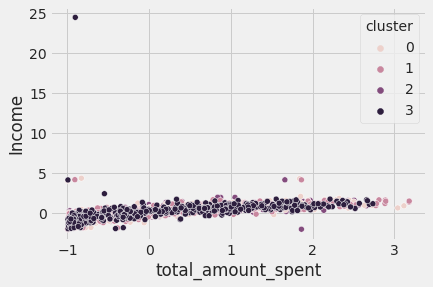

In [ ]:
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster')

## Eval Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

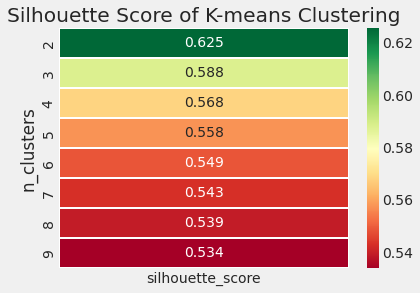

In [ ]:
visualize_silhouette_layer(X)

# Customer personality analysis for marketing retargeting

In [ ]:
df[nums+['cluster']].groupby('cluster')['Income', 'total_amount_spent'].describe()

<ipython-input-42-c4f40bacde95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[nums+['cluster']].groupby('cluster')['Income', 'total_amount_spent'].describe()


Income                                                         \
         count          mean           std          min           25%   
cluster                                                                 
0       559.00 53,355,010.73 22,226,784.98 4,861,000.00 36,137,500.00   
1       551.00 51,212,381.13 20,767,249.55 1,730,000.00 36,204,500.00   
2       555.00 51,468,562.16 21,375,988.60 2,447,000.00 33,787,000.00   
3       551.00 52,942,620.69 33,997,801.19 4,023,000.00 34,236,000.00   

                                                   total_amount_spent  \
                  50%           75%            max              count   
cluster                                                                 
0       52,750,000.00 70,581,000.00 162,397,000.00             559.00   
1       50,664,000.00 66,168,000.00 157,733,000.00             551.00   
2       50,785,000.00 67,795,500.00 157,243,000.00             555.00   
3       52,513,000.00 69,611,000.00 666,666,000.00             551.00   

                                                                           \
              mean        std       min       25%        50%          75%   
cluster                                                                     
0       635,940.97 614,937.83  6,000.00 71,000.00 424,000.00 1,091,500.00   
1       584,328.49 597,588.37  5,000.00 75,000.00 339,000.00   991,000.00   
2       597,929.73 595,874.10 10,000.00 65,000.00 358,000.00 1,043,500.00   
3       609,749.55 603,327.03  8,000.00 67,500.00 413,000.00 1,059,500.00   

                      
                 max  
cluster               
0       2,486,000.00  
1       2,525,000.00  
2       2,209,000.00  
3       2,257,000.00

berdasarkan tabel diatas bahwa 
- cluster 0 memiliki rata-rata income sebesar 53,355,010 dan rata-rata total amount spent sebesar 635,940
- cluster 1 memiliki rata-rata income sebesar 51,212,381 dan rata-rata total amount spent sebesar 584,328
- cluster 2 memiliki rata-rata income sebesar 51,468,562 dan rata-rata total amount spent sebesar 597,929
- cluster 3 memiliki rata-rata income sebesar 52,942,620 dan rata-rata total amount spent sebesar 609,749


Text(0.5, 1.0, 'Number of User per Cluster')

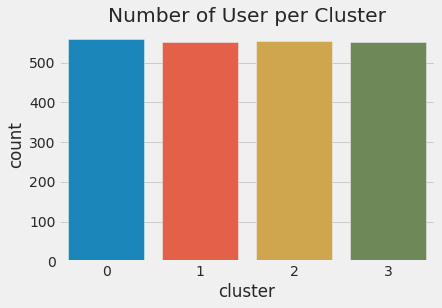

In [ ]:
sns.countplot(x=df['cluster'])
plt.title('Number of User per Cluster')

(0.0, 120000000.0)

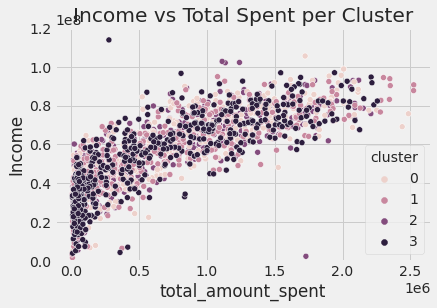

In [ ]:
sns.scatterplot(x=df['total_amount_spent'], y=df['Income'], hue=df['cluster'])
plt.title('Income vs Total Spent per Cluster')
plt.ylim(0, 120000000)

(0.0, 120000000.0)

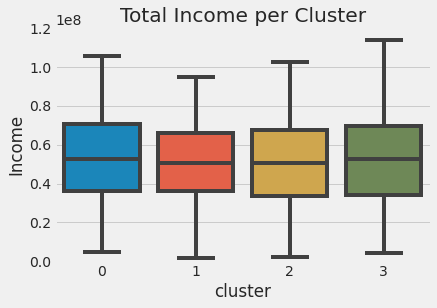

In [ ]:
sns.boxplot(x=df['cluster'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

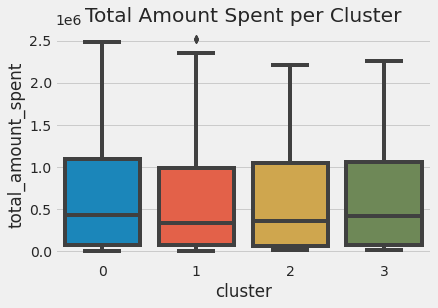

In [ ]:
sns.boxplot(x=df['cluster'], y=df['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

In [ ]:
df[nums+['cluster']].groupby('cluster')['NumWebVisitsMonth','NumDealsPurchases','conversion_rate'].describe()

<ipython-input-47-3236c846461f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[nums+['cluster']].groupby('cluster')['NumWebVisitsMonth','NumDealsPurchases','conversion_rate'].describe()


NumWebVisitsMonth                                      \
                    count mean  std  min  25%  50%  75%   max   
cluster                                                         
0                  559.00 5.15 2.52 0.00 3.00 5.00 7.00 20.00   
1                  551.00 5.52 2.46 1.00 4.00 6.00 7.00 20.00   
2                  555.00 5.33 2.36 0.00 3.00 6.00 7.00 20.00   
3                  551.00 5.28 2.35 0.00 4.00 6.00 7.00 19.00   

        NumDealsPurchases                                     conversion_rate  \
                    count mean  std  min  25%  50%  75%   max           count   
cluster                                                                         
0                  559.00 2.28 1.86 0.00 1.00 2.00 3.00 15.00          559.00   
1                  551.00 2.44 2.07 0.00 1.00 2.00 3.00 15.00          551.00   
2                  555.00 2.30 1.93 0.00 1.00 2.00 3.00 15.00          555.00   
3                  551.00 2.28 1.82 0.00 1.00 2.00 3.00 15.00          551.00   

                                             
        mean  std  min  25%  50%  75%   max  
cluster                                      
0       4.59 4.83 0.00 1.25 3.00 6.00 28.00  
1       4.25 4.79 0.00 1.22 2.50 5.29 28.00  
2       4.42 5.09 0.00 1.25 2.50 5.45 43.00  
3       4.30 4.85 0.00 1.21 2.57 5.00 27.00

berdasarkan tabel diatas bahwa 
- cluster 0 memiliki rata-rata web visit per month sebesar 5.15, rata-rata Deal Purchases sebesar 2.28 dan rata-rata conversion rate sebesar 4.59
- cluster 1 memiliki rata-rata web visit per month sebesar 5.52, rata-rata Deal Purchases sebesar 2.44 dan rata-rata conversion rate sebesar 4.25
- cluster 2 memiliki rata-rata web visit per month sebesar 5.33, rata-rata Deal Purchases sebesar 2.30 dan rata-rata conversion rate sebesar 4.42
- cluster 3 memiliki rata-rata web visit per month sebesar 5.28, rata-rata Deal Purchases sebesar 2.28 dan rata-rata conversion rate sebesar 4.30

Text(0.5, 1.0, 'Total Visit Web per Cluster')

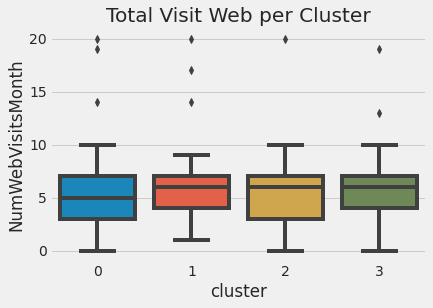

In [ ]:
sns.boxplot(x=df['cluster'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

Text(0.5, 1.0, 'Deal Puchased per Cluster')

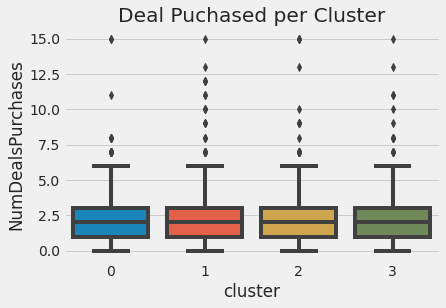

In [ ]:
sns.boxplot(x=df['cluster'], y=df['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

Text(0.5, 1.0, 'Conversion Rate per Cluster')

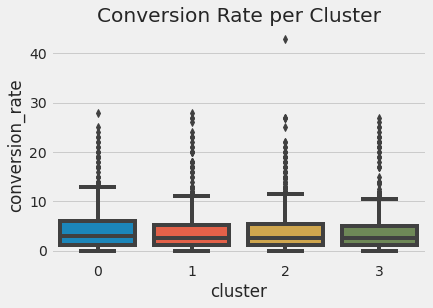

In [ ]:
sns.boxplot(x=df['cluster'], y=df['conversion_rate'])
plt.title('Conversion Rate per Cluster')

In [ ]:
df_tas=df[nums+['cluster']].groupby('cluster')['total_amount_spent'].sum().reset_index()
df_tas

,cluster,total_amount_spent
0,0,355491000
1,1,321965000
2,2,331851000
3,3,335972000


Text(0.5, 1.0, 'Total Amount Spent per Cluster')

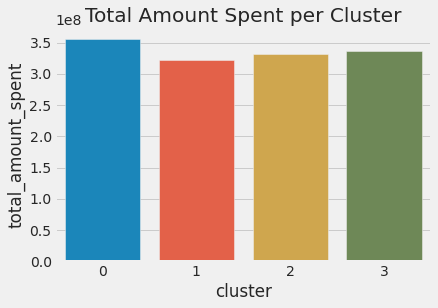

In [ ]:
sns.barplot(x=df_tas['cluster'], y=df_tas['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2216 non-null   int64         
 1   ID                       2216 non-null   int64         
 2   Year_Birth               2216 non-null   int64         
 3   Education                2216 non-null   object        
 4   Marital_Status           2216 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2216 non-null   int64         
 7   Teenhome                 2216 non-null   int64         
 8   Dt_Customer              2216 non-null   datetime64[ns]
 9   Recency                  2216 non-null   int64         
 10  MntCoke                  2216 non-null   int64         
 11  MntFruits                2216 non-null   int64         
 12  MntMeatProducts          2216 non-

In [ ]:
df.groupby('cluster')['age_range'].describe()

,count,unique,top,freq
cluster,,,,
0,559,5,teens,119
1,551,5,middle_adults,119
2,555,5,child,125
3,551,5,child,123


# Customer personality analysis for marketing retargeting

## Cluster Analysis & Interpretation

### Statistical Summary per Cluster

In [ ]:
numerical_features

NameError: ignored

In [ ]:
dataset[numerical_features+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

In [ ]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

dataset['cluster_mapped'] = dataset['cluster'].map(map_cluster)

In [ ]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=dataset['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

In [ ]:
plot = sns.jointplot(x=dataset["total_amount_spent"], y=dataset["Income"], hue=dataset["cluster"])
plt.title('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)

### Total Income per Cluster

In [ ]:
sns.boxenplot(x=dataset['cluster'], y=dataset['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### Total Spending per Cluster

In [ ]:
sns.boxenplot(x=dataset['cluster'], y=dataset['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

Cluster 1 and 2 spent the highest respectively

### Total Visits per Cluster

In [ ]:
sns.boxenplot(x=dataset['cluster'], y=dataset['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

### Deal Puchased per Cluster

In [ ]:
sns.boxenplot(x=dataset['cluster'], y=dataset['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

### Conversion per Cluster

In [ ]:
sns.boxenplot(x=dataset['cluster'], y=dataset['cvr'])
plt.title('CVR per Cluster')

## Interpretation Cluster Summary

1. Low Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 1, dengan median sebanyak 5 kali dalam sebulan, walaupun demikian, kelompok ini cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 57 Juta untuk total pendapatan setahun, dan IDR 506K untuk pengeluaran dalam setahun


2. Risk of Churn:
- Kelompok ini adalah kelompok dengan jumlah user terbesar sebanyak 900 orang yang di dominasi oleh middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya, yang masing-masing sebesar IDR 33.4 Juta untuk total pendapatan setahun, dan IDR 57K untuk pengeluaran dalam setahun
- Walaupun demikian, kelompok ini adalah kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya
- Secara campaign juga tidak banyak yang merespon dibandingkan dengan Kelompok lainnya. Mereka datang secara organic


3. Mid Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 0-1 anak
- elompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 68 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Walaupun cukup jarang untuk visit web, Kelompok ini adalah kelompok yang paling sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan


4. High Spender:
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 137 orang yang di dominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah belum/tidak menikah dan belum mempunyai anak 
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 80 Juta untuk total pendapatan setahun, dan IDR 1.2 Juta untuk pengeluaran dalam setahun
- Cluster ini cukup banyak yang merupakan non-organic dengan merespon campaign, namun memiliki jumlah penggunaan promo yang paling sedikit dibandingkan dengan yang lainnya.
- Kelompok ini adalah kelompok yang mempunyai conversion rate terbesar untuk membeli produk kita, dan kita jangan sampai kehilangan mereka.

## Recommendation & Potential Impact

Recommendation:
1. Tetap monitor transaksi dan retensi dari kelompok High Spender, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn
2. Untuk kelompok Mid Spender dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita
3. Untuk kelompok Low Spender dan Risk to Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

Potential Impact:
- Jika kita fokus untuk terus monitor kelompok High Spender, kita akan tetap mendapatkan potensial GMV sebesar IDR 176 Juta, sedangkan untuk kelompok Mid Spender sebesar IDR 66 Juta
- Jika kita dapat optimasi promo yang di spend untuk Mid Spender (dengan asumsi reduksi 50%)m kita dapat melakukan reduksi cost seevsar IDR 50 Juta

In [ ]:
dataset[dataset.cluster == 3].total_amount_spent.sum()

In [ ]:
dataset[dataset.cluster == 3].total_amount_spent.sum() / dataset[dataset.cluster == 3].total_transaction.sum()

In [ ]:
dataset[dataset.cluster == 2].total_amount_spent.sum()

In [ ]:
dataset[dataset.cluster == 2].total_amount_spent.sum() / dataset[dataset.cluster == 2].total_transaction.sum()

In [ ]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(dataset[dataset.cluster == 2].total_amount_spent.sum() / dataset[dataset.cluster == 2].total_transaction.sum()) * dataset[dataset.cluster == 2].NumDealsPurchases.sum()

In [ ]:
81151330*0.5